In [10]:
from statistics import mean
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

Import samples from the posterior

In [ ]:
with open('/home/yaning/Documents/Discounting/paper/results/parameter_recovery_tanh.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

# get the real and inferred params from more agents
real_params = []
inferred_params = []
real_params = pos_dict['real_param']
inferred_params = pos_dict['inferred_param']['m_locs']

In [17]:
# --------for tanh and four param------------------
real_sigma_rate = real_params[:,0]
inferred_sigma_rate = inferred_params[:,0]

real_a = real_params[:,1]
inferred_a = inferred_params[:,1]

real_b = real_params[:,2]
inferred_b = inferred_params[:,2]

real_beta = real_params[:,3]
inferred_beta = inferred_params[:,3]

# #-----------three param------------
# real_b = real_params[:,1]
# inferred_b = inferred_params[:,1]

# real_sigma_rate = real_params[:,0]
# inferred_sigma_rate = inferred_params[:,0]

# real_beta = real_params[:,2]
# inferred_beta = inferred_params[:,2]

# # # --------for tanh------------------

# real_sigma_rate = real_params[:,0]
# inferred_sigma_rate = inferred_params[:,0]

# real_beta = real_params[:,1]
# inferred_beta = inferred_params[:,1]


Plot with the same range for the x and y axis

In [18]:
def same_range(ax, x, y):
    # Calculate the maximum range between x and y
    list = np.concatenate((x,y))

    max_range = max(list) - min(list)

    # Calculate the center of the plot
    center = (max(list) + min(list)) / 2

    # Set the limits of both axes with the same range around the center
    small = center - max_range / 1.7
    big = center + max_range / 1.7
    ax.set_xlim(small, big)
    ax.set_ylim(small, big)

    # ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Diagonal Line')

In [19]:
# put everything to lists so it is easier to plot
real_list = [
real_a, 
real_b, 
real_sigma_rate, real_beta]
inferred_list = [
inferred_a, 
inferred_b, 
inferred_sigma_rate, inferred_beta]

# try dataframe instead
df = pd.DataFrame({
    'real_a': real_a,
    'real_b': real_b,
    'real_sigma_u': real_sigma_rate,
    'real_beta': real_beta,
    'inferred_a': inferred_a,
    'inferred_b': inferred_b,
    'inferred_sigma_u': inferred_sigma_rate,
    'inferred_beta': inferred_beta
})

In [20]:
name_list = [
'real_a','inferred_a',
'real_b','inferred_b',
'real_sigma_u','inferred_sigma_u',
'real_beta','inferred_beta']

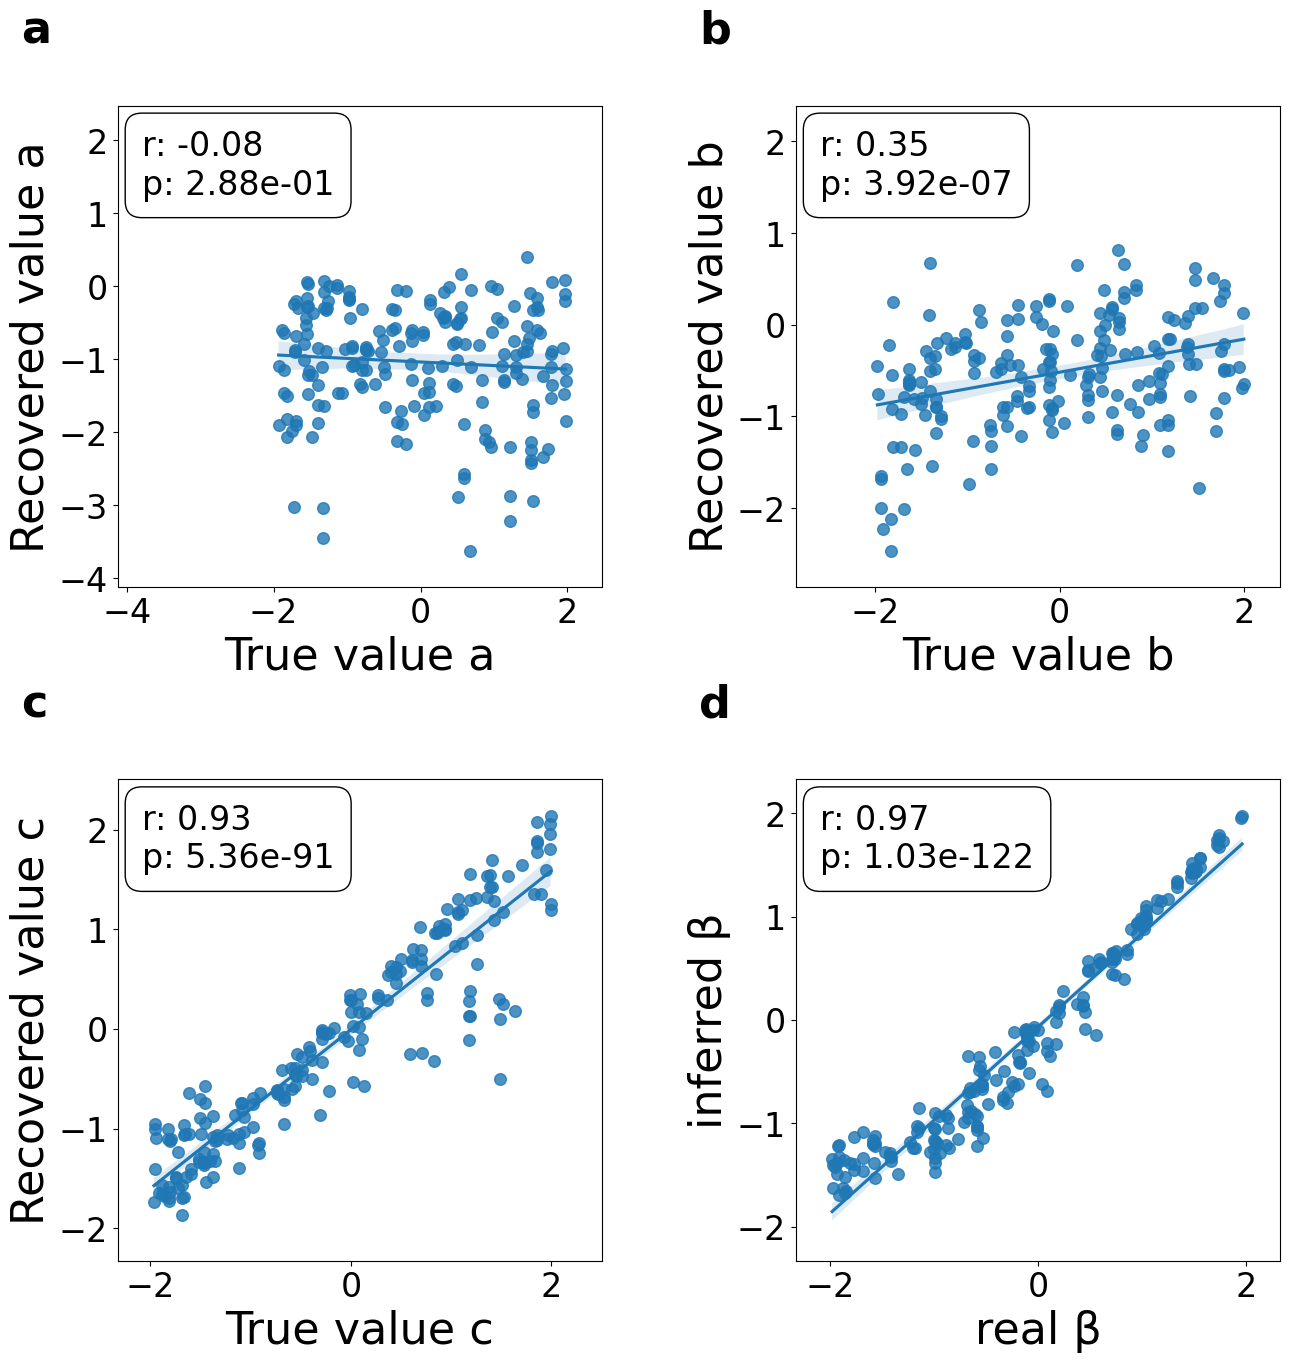

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sub_x = 0
sub_y = 0

label_size = 32
tick_size = 24

for i in range(len(real_list)):
    x_name = name_list[i*2]
    y_name = name_list[i*2+1]
    temp_ax = axes[sub_x, sub_y]
    sns.regplot(ax=temp_ax, x=x_name, y=y_name, data=df, scatter_kws={'s':70})
    same_range(temp_ax, df[x_name], df[y_name])
    corr_coeff, p_value = pearsonr(df[x_name], df[y_name])

    temp_ax.annotate(f'r: {corr_coeff:.2f}\np: {p_value:.2e}', xy=(0.05, 0.95), xycoords='axes fraction', 
                fontsize=tick_size, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
    
    if sub_y == 1:
        sub_x = sub_x + 1
        sub_y = 0
    else:
        sub_y = sub_y + 1

    temp_ax.tick_params(axis='both', labelsize=tick_size)
    temp_ax.text(
        -0.2, 1.2, f"{chr(97 + i)}",  # 97 = 'a'
        transform=temp_ax.transAxes,
        fontsize=32, fontweight='bold',
        va='top', ha='left'
    )


axes[0,0].set_xlabel("True value a", fontsize=label_size)
axes[0,0].set_ylabel("Recovered value a", fontsize=label_size)
axes[0,1].set_xlabel("True value b", fontsize=label_size)
axes[0,1].set_ylabel("Recovered value b", fontsize=label_size)
axes[1,0].set_xlabel("True value c", fontsize=label_size)
axes[1,0].set_ylabel("Recovered value c", fontsize=label_size)
axes[1,1].set_xlabel("real β", fontsize=label_size)
axes[1,1].set_ylabel("inferred β", fontsize=label_size)

# axes[1,0].set_visible(False)
# axes[1,1].set_visible(False)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

plt.savefig("/home/yaning/Documents/Discounting/paper/results/pr_tanh.png", dpi=300)
plt.show()
plt.close()

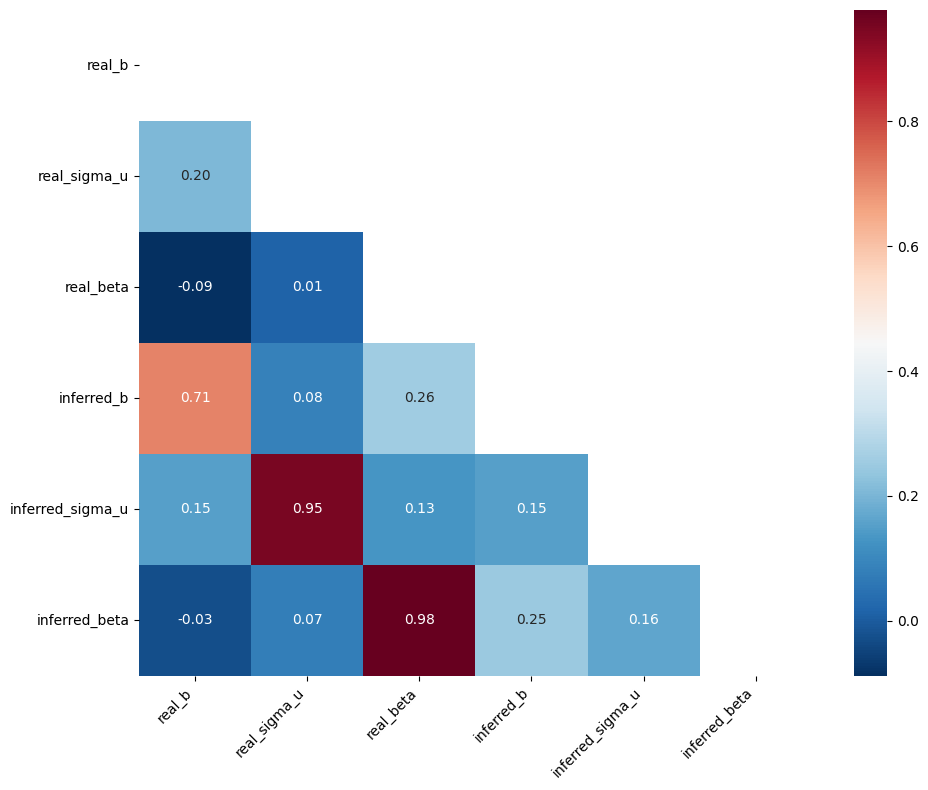

In [193]:
# -----------------------------correlation--------------------------------------
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, mask=mask, fmt=".2f", cmap='RdBu_r', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

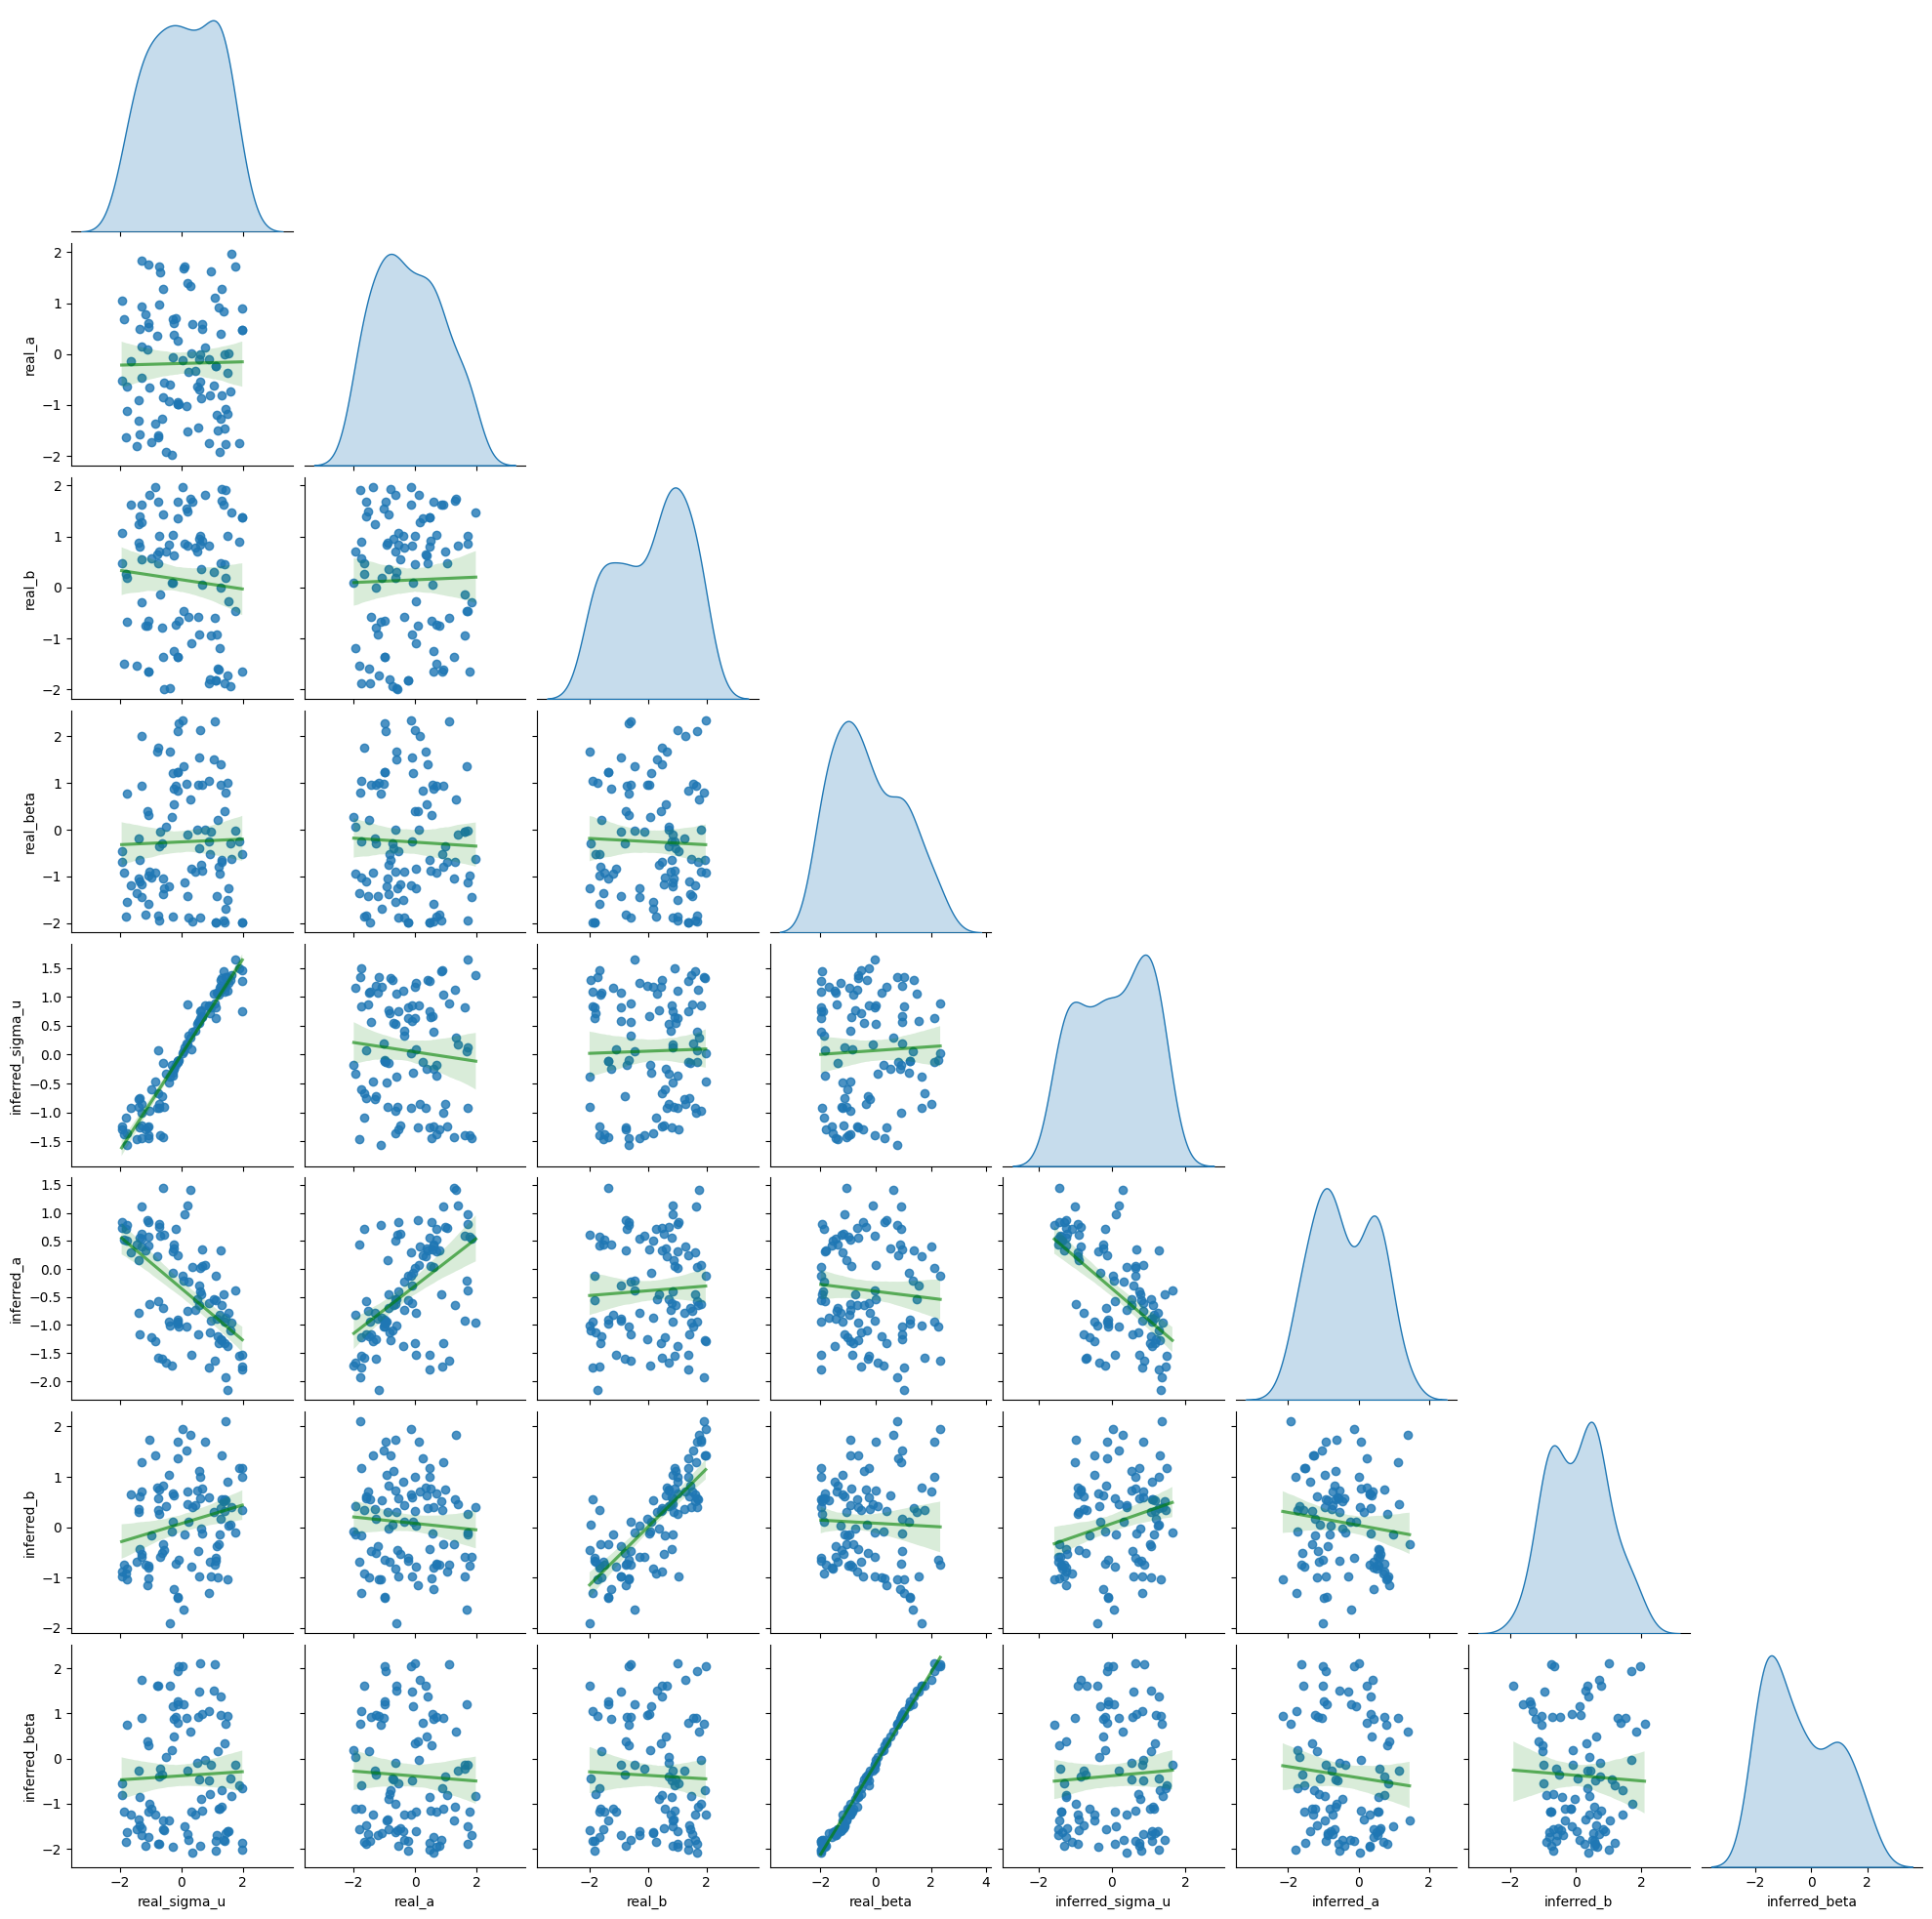

In [61]:
plt.figure()
f = sns.pairplot(data=df, kind='reg', diag_kind="kde", corner=True,
                    plot_kws={'line_kws': {'color': 'green', 'alpha': 0.6}})
# f.map(annot_corrfunc)